               y  x1    x2    x3
0   88394.311262   0  1000  2000
1   19617.242600   1  1100  2200
2   35810.594142   2  1200  2400
3 -233911.640472   3  1300  2600
4 -108378.111633   4  1400  2800
                 y   x1     x2     x3
360   66424.262836  360  37000  74000
361   94448.866814  361  37100  74200
362  194846.790437  362  37200  74400
363  -29134.090927  363  37300  74600
364  271277.862566  364  37400  74800
y     57058.562849
x1      182.000000
x2    19200.000000
x3    38400.000000
dtype: float64


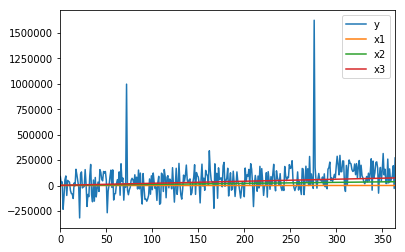

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 乱数を固定
rand = np.random.RandomState(seed=20)

# データを生成
idx = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')
x = np.arange(len(idx))
y = 5 \
    + x ** 2 \
    + np.sin(x/4) * 100 \
    + rand.randn(len(x)) * 100000 \
    + rand.gamma(0.01, 1000000, len(x))

df = pd.DataFrame({'y':y, 'x1':x})
df['x2'] = df['x1']*100 +1000
df['x3'] = df['x1']*200 +2000
print(df.head())
print(df.tail())
print(df.mean())
df.plot()

365


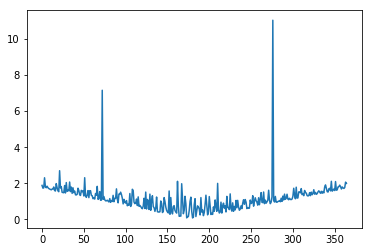

In [2]:
from scipy.spatial import distance

# 平均値、共分散行列
mean = np.mean(df, axis=0)
cov = np.cov(df.T)
maharanobis_list = []

# rowのマハラノビス距離計算
for index, row in df.iterrows():
    maharanobis = distance.mahalanobis(row, mean, np.linalg.pinv(cov))
    maharanobis_list.append(maharanobis)

print(len(maharanobis_list))
plt.plot(maharanobis_list)